In [1]:
from IPython.display import Audio, Image, YouTubeVideo

# LESSON 4: Deeper Into SQL


## CHAPTER 1: Intro to Creating Tables

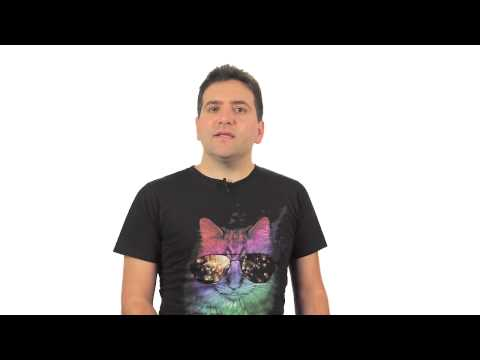

In [2]:
id = 'mIIL-p2gaK4'
YouTubeVideo(id=id, width=600)

## CHAPTER 2: Normalized Design Part One

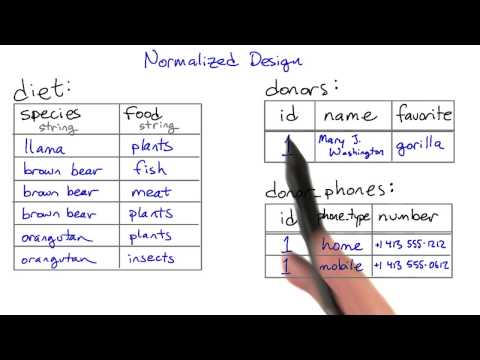

In [3]:
id = 'LQq5F77ANiY'
YouTubeVideo(id=id, width=600)

Check out William Kent's paper ["A Simple Guide to Five Normal Forms in Relational Database Theory"](http://www.bkent.net/Doc/simple5.htm) for a lot more about normalization and how it can help your database design.

## CHAPTER 3: Normalized Design Part Two

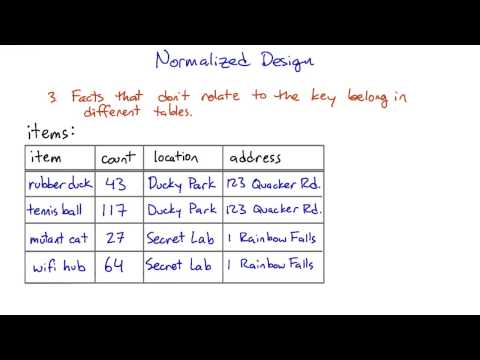

In [4]:
id = 'l6SDnhM7B_k'
YouTubeVideo(id=id, width=600)

Check out William Kent's paper ["A Simple Guide to Five Normal Forms in Relational Database Theory"](http://www.bkent.net/Doc/simple5.htm) for a lot more about normalization and how it can help your database design.

Wikipedia's article on [database normalization](https://en.wikipedia.org/wiki/Database_normalization) is somewhat brief, but describes some of the history of normalization as well as some more of the motivations for it.

You will sometimes hear about denormalization as an approach to making database queries faster by avoiding joins. This is an advanced topic beyond the scope of this course. But if you're interested in it, on modern database systems (such as PostgreSQL) it is often possible to meet the same goals using tools such as [indexes](https://www.postgresql.org/docs/9.4/sql-createindex.html) and [materialized views](https://www.postgresql.org/docs/9.4/sql-creatematerializedview.html).


## CHAPTER 4: Quiz: What's Normalized

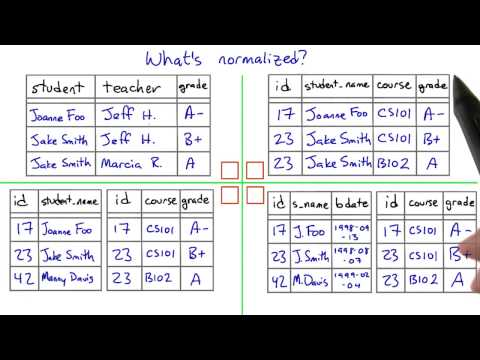

In [5]:
id = 'T_LpzJl-EVE'
YouTubeVideo(id=id, width=600)

### Rules for normalized tables:

#### 1. Every row has the same number of columns.
In practice, the database system won't let us literally have different numbers of columns in different rows. But if we have columns that are sometimes empty (null) and sometimes not, or if we stuff multiple values into a single field, we're bending this rule.

The example to keep in mind here is the diet table from the zoo database. Instead of trying to stuff multiple foods for a species into a single row about that species, we separate them out. This makes it much easier to do aggregations and comparisons.

#### 2. There is a unique key and everything in a row says something about the key.
The key may be one column or more than one. It may even be the whole row, as in the diet table. But we don't have duplicate rows in a table.

More importantly, if we are storing non-unique facts — such as people's names — we distinguish them using a unique identifier such as a serial number. This makes sure that we don't combine two people's grades or parking tickets just because they have the same name.

#### 3. Facts that don't relate to the key belong in different tables.
The example here was the items table, which had items, their locations, and the location's street addresses in it. The address isn't a fact about the item; it's a fact about the location. Moving it to a separate table saves space and reduces ambiguity, and we can always reconstitute the original table using a join.

#### 4. Tables shouldn't imply relationships that don't exist.
The example here was the job_skills table, where a single row listed one of a person's technology skills (like 'Linux') and one of their language skills (like 'French'). This made it look like their Linux knowledge was specific to French, or vice versa ... when that isn't the case in the real world. Normalizing this involved splitting the tech skills and job skills into separate tables.

#### Answer:

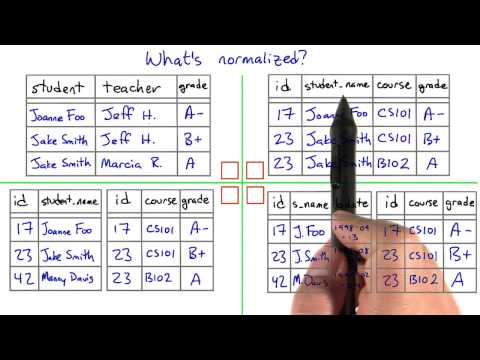

In [6]:
id = 'f1fz9cLnetM'
YouTubeVideo(id=id, width=600)

## CHAPTER 5: Create Table and Types

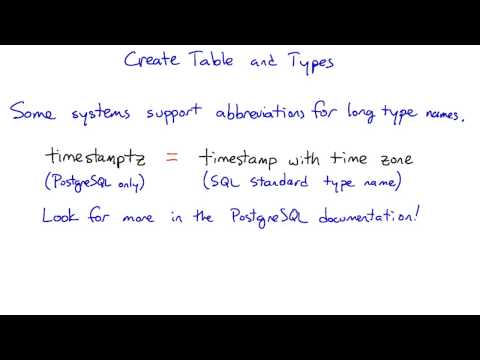

In [7]:
id = 'cjbpD7NZhAs'
YouTubeVideo(id=id, width=600)

There are occasions where you'd want to create tables from within your application's code. For instance, this can be a handy way to have it set itself up when you first run it. (That's what your browser does when it creates your cookies file, for instance.)


## CHAPTER 6: Quiz: Creating and Dropping

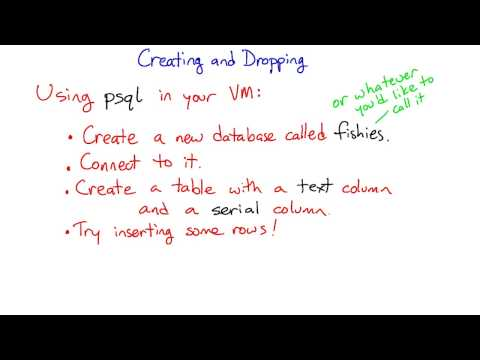

In [8]:
id = 'fqu1CzUY-PA'
YouTubeVideo(id=id, width=600)

Since not everything fits on the screen at once, here's what to try in __psql__:

* Create a new database called __fishies__ (or whatever you like).
* Connect to it with __\c fishies__, or by exiting __psql__ and running __psql fishies__.
* In the new database, create a table that has two columns: a __text__ column and a __serial__ column.
* Try running __insert__ statements into this table, providing only a value for the __text__ column. (For an example, scroll down to the bottom of this page.)

---

Look up these commands in the PostgreSQL documentation:

* [Create Database](https://www.postgresql.org/docs/9.4/sql-createdatabase.html)
* [Drop Database](https://www.postgresql.org/docs/9.4/sql-dropdatabase.html)
* [Create Table](https://www.postgresql.org/docs/9.4/sql-createtable.html)
* [Drop Table](https://www.postgresql.org/docs/9.4/sql-droptable.html)

---

Here's an example __insert__ statement you might try. Replace sometable with the name of the table you created:
```python
insert into sometable values ('This is text!');
```
For more detail on the __serial__ type, take a look at the last section of this page in the PostgreSQL manual: http://www.postgresql.org/docs/9.4/static/datatype-numeric.html


## CHAPTER 7: Quiz: Declaring Primary Keys

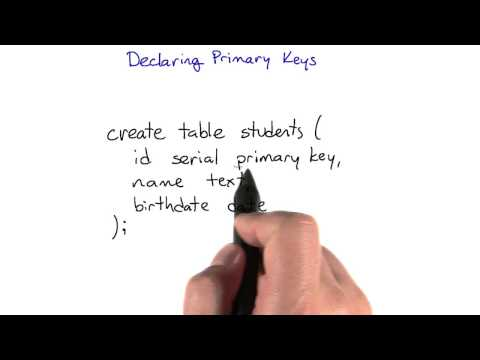

In [9]:
id = 'AaLIKufl_mY'
YouTubeVideo(id=id, width=600)

#### Answer:

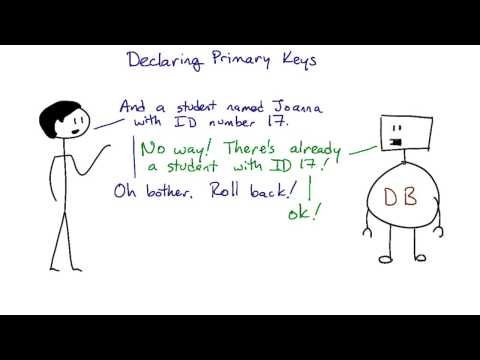

In [10]:
id = 'P1NzBPnfl2E'
YouTubeVideo(id=id, width=600)

## CHAPTER 8: Declaring Relationships

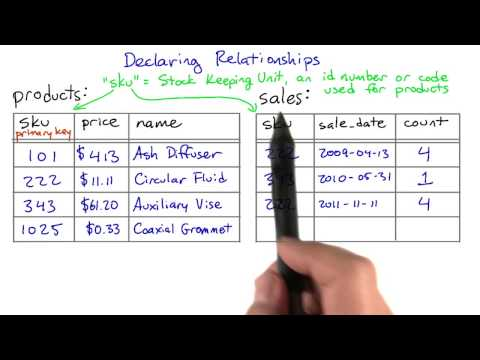

In [11]:
id = '1FjqstT1faI'
YouTubeVideo(id=id, width=600)

## CHAPTER 9: Foreign Keys

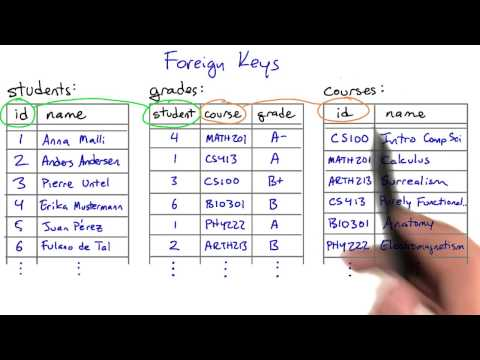

In [12]:
id = 'fnbLMcd0FGQ'
YouTubeVideo(id=id, width=600)

The tables in this quiz:

#### users:
username |	full_name
---|---
PrinceUtena |	Tenjō Utena
arachnidsGrip |	Vriska Serket
drFalken |	Stephen Falken
... |	...

#### posts:
content |	author |	id
--|--|--
Hello m8s! This is your ... |	arachnidsGrip |	1
I miss Joshua. Maybe I will write some code ... |	drFalken |	2
... |	... |	...

#### votes:
post_id |	voter |	vote
--|--|--
1 |	drFalken |	-1
2 |	PrinceUtena |	1
2 |	tipsyGnostalgic |	-1
... |	... |	...


## CHAPTER 10: Self joins

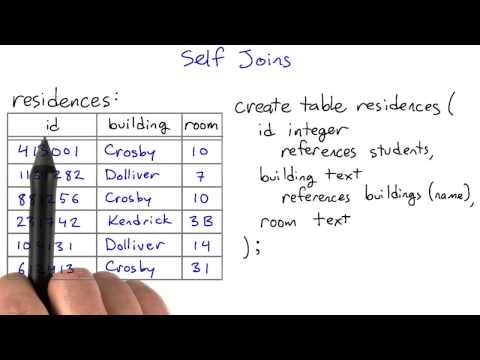

In [13]:
id = 'P1aYwQhPnPQ'
YouTubeVideo(id=id, width=600)

#### Answer:

```python
# -- Roommate Finder v0.9
# --
# -- This query is intended to find pairs of roommates.  It almost works!
# -- There's something not quite right about it, though.  Find and fix the bug.

select a.id, b.id, a.building, a.room
       from residences as a, residences as b
 where a.building = b.building
   and a.room = b.room
   and a.id != b.id
   and a.id < b.id
 order by a.building, a.room;

# -- To see the complete residences table, comment out the query above,
# -- uncomment this query and press "Test Run":

# -- select id, building, room from residences;
```

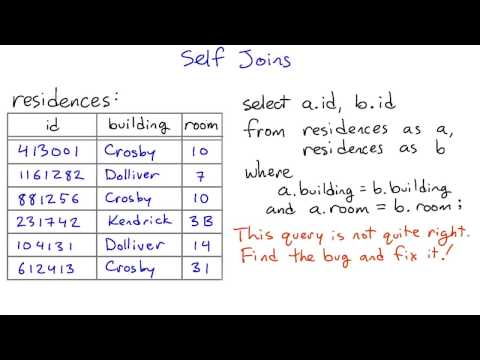

In [14]:
id = 'dHS0BtLFTSQ'
YouTubeVideo(id=id, width=600)

## Counting What Isn't There

Counting what isn’t there

Counting rows in a single table is something you’ve seen many times before in this course. A column aggregated with the __count__ aggregation function will return the number of rows in the table, or the number of rows for each value of a __group by__ clause.

For instance, you saw queries like these back in Lesson 2:
```python
select count(*) from animals;
```
*-- returns the number of animals in the zoo*
```python
select count(*) from animals where species = 'gorilla';
```
*-- returns the number of gorillas*
```python
select species, count(*) from animals group by species;
```
*-- returns each species’ name and the number of animals of that species*

Things get a little more complicated if you want to count the results of a __join__. Consider these tables we saw earlier in Lesson 4, the __products__ and __sales__ tables for a store:

---
#### products:
sku primary key |	price |	name
--|--|--
101 |	\$4.13 |	Ash Diffuser
222 |	\$11.11 |	Circular Fluid
343 |	\$61.20 |	Auxiliary Vise
1025 |	\$0.33 |	Coaxial Grommet

---
#### sales:
sku |	sale_date |	count
--|--|--
222 |	2009-04-13 |	4
343 |	2010-05-31 |	1
222 |	2011-11-11 |	4

Suppose that we want to know how many times we have sold each product. In other words, for each __sku__ value in the __products__ table, we want to know the number of times it occurs in the __sales__ table. We might start out with a query like this:
```python
select products.name, products.sku, count(*) as num
  from products join sales
    on products.sku = sales.sku
  group by products.sku;
```
But this query might not do exactly what we want. If a particular __sku__ has never been sold — if there are no entries for it in the __sales__ table — then this query will not return a row for it at all.

If we wanted to see a row with the number zero in it, we’ll be disappointed!

However, there is a way to get the database to give us a count with a zero in it. To do this, we’ll need to change two things about this query —
```python
select products.name, products.sku, count(sales.sku) as num
  from products left join sales
    on products.sku = sales.sku
  group by products.sku;
```
This query will give us a row for every __product__ in the products table, even the ones that have no sales in the __sales__ table.

What’s changed? First, we’re using __count(sales.sku)__ instead of __count(\*)__. This means that the database will count only rows where __sales.sku__ is defined, instead of all rows.

Second, we’re using a __left join__ instead of a plain __join__.

### Um, so what’s a left join?

SQL supports a number of variations on the theme of joins. The kind of join that you have seen earlier in this course is called an inner join, and it is the most common kind of join — so common that SQL doesn’t actually make us say "inner join" to do one.

But the second most common is the __left join__, and its mirror-image partner, the __right join__. The words “left” and “right” refer to the tables to the left and right of the join operator. (Above, the left table is __products__ and the right table is __sales__.)

A regular (inner) join returns only those rows where the two tables have entries matching the join condition. A __left join__ returns all those rows, plus the rows where the left table has an entry but the right table doesn’t. And a __right join__ does the same but for the __right table__.

(Just as “join” is short for “inner join”, so too is “left join” actually short for “left outer join”. But SQL lets us just say “left join”, which is a lot less typing. So we’ll do that.)

### Quiz

Below, you'll see a query written with __count(\*)__ and an inner __join__. Try running it as is, then change it as described above and see what happens!

#### Answer:
```python
#-- Here are two tables describing bugs found in some programs.
#-- The "programs" table gives the name of each program and the files
#-- that it's made of.  The "bugs" table gives the file in which each
#-- bug was found.
#--
#-- create table programs (
#--    name text,
#--    filename text
#-- );
#-- create table bugs (
#--    filename text,
#--    description text,
#--    id serial primary key
#-- );
#--
#-- The query below is intended to count the number of bugs in each
#-- program. But it doesn't return a row for any program that has zero
#-- bugs. Try running it as it is.  Then change it so that the results
#-- will also include rows for the programs with no bugs.  These rows
#-- should have a 0 in the "bugs" column.

select programs.name, count(bugs.filename) as num
   from programs left join bugs
        on programs.filename = bugs.filename
   group by programs.name
   order by num;
```
### or

#### Solution

Here's the original query from the quiz again —
```python
select programs.name, count(*) as num
       from programs join bugs
         on programs.filename = bugs.filename
       group by programs.name
       order by num;
```
And here's one possible corrected version:
```python
select programs.name, count(bugs.filename) as num
       from programs left join bugs
         on programs.filename = bugs.filename
       group by programs.name
       order by num;
```
Something to watch out for: What do you put in the ``count`` aggregation? If you leave it as ``count(*)`` or use a column from the ``programs`` table, your query will count entries that don't have bugs as well as ones that do.

In order to correctly report a zero for programs that don't have any entries in the ``bugs`` table, you have to use a column from the ``bugs`` table as the argument to ``count``.

For instance, ``count(bugs.filename)`` will work, and so will ``count(bugs.description)``.


## CHAPTER 12: Subqueries

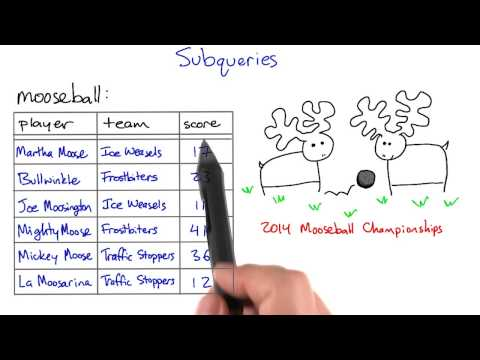

In [15]:
id = '7G24LiGgmGI'
YouTubeVideo(id=id, width=600)

Here are some sections in the PostgreSQL documentation that discuss other forms of subqueries:

[Scalar Subqueries](https://www.postgresql.org/docs/9.4/sql-expressions.html#SQL-SYNTAX-SCALAR-SUBQUERIES)
[Subquery Expressions](https://www.postgresql.org/docs/9.4/functions-subquery.html)
[The FROM clause](https://www.postgresql.org/docs/9.4/sql-select.html#SQL-FROM)

## CHAPTER 13: Quiz: One Query Not Two

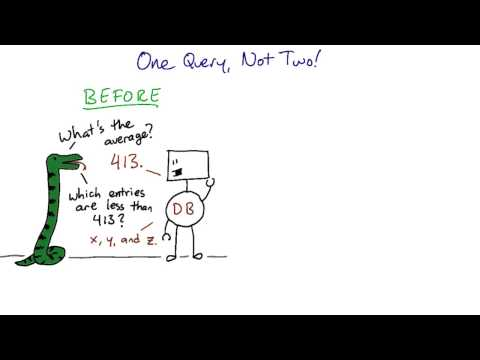

In [16]:
id = 'n7v-y8UrVJ0'
YouTubeVideo(id=id, width=600)

SQLite does not require a table alias (the __as subq__ part) in this query. However, PostgreSQL does, and other database systems may.

See [the PostgreSQL documentation](https://www.postgresql.org/docs/9.4/queries-table-expressions.html#QUERIES-SUBQUERIES) for details.

### Answer:
```python
# Find the players whose weight is less than the average.
# 
# The function below performs two database queries in order to find the right players.
# Refactor this code so that it performs only one query.
#

def lightweights(cursor):
    """Returns a list of the players in the db whose weight is less than the average."""
    cursor.execute('''select name, weight from players, ( select avg(weight) as av from players) as pl
    where weight < av''')
    return cursor.fetchall()
```

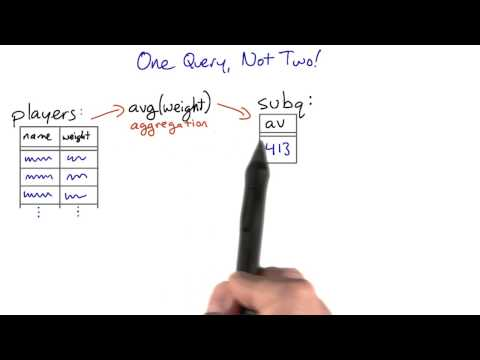

In [17]:
id = '_c_chcNiHyo'
YouTubeVideo(id=id, width=600)

## CHAPTER 14: Quiz: Views

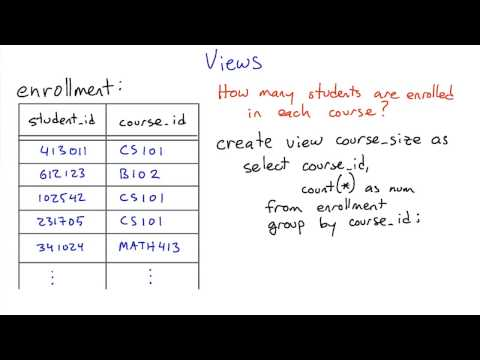

In [18]:
id = 't_ZSrov187k'
YouTubeVideo(id=id, width=600)

#Answer:

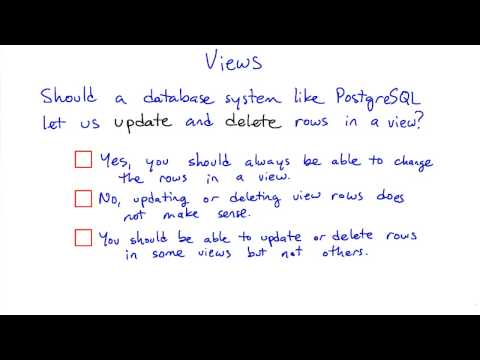

In [19]:
id = 'omL8MVZjLts'
YouTubeVideo(id=id, width=600)

### Creating views — Quiz
Now, try creating a view of your own in the programming quiz below.
```python
#-- Here's a select statement that runs on the zoo database.
#-- It selects the species with the top five highest populations in the zoo.
#-- Change it into a statement that creates a view named "topfive".

create view topfive as select species, count(*) as num 
  from animals
  group by species
  order by num desc
  limit 5;

# ANSWER:
#-- Don't change the statement below!  It's there to test the view.

select * from topfive;
```



## CHAPTER 15: Reference — Deeper into SQL

### Reference — Deeper into SQL

This is a reference for the material covered in the "Deeper into SQL" lesson.

---
### The __create table__ statement

The full syntax of the __create table__ statement is quite complex. See the [PostgreSQL create table documentation](https://www.postgresql.org/docs/9.4/sql-createtable.html) for the whole thing. Here's the syntax for the form we're seeing in this lesson:
```python
create table table ( column type [restriction] , ... ) [rowrestriction] ;
```
There are a lot of restrictions that can be put on a column or a row. __primary key__ and __references__ are just two of them. See the "Examples" section of the [create table documentation](https://www.postgresql.org/docs/9.4/sql-createtable.html) for many, many more.

---
### Rules for normalized tables

In a normalized database, the relationships among the tables match the relationships that are really there among the data. Examples [here](https://classroom.udacity.com/courses/ud197) refer to tables in Lessons 2 and 4.

#### 1. Every row has the same number of columns.
In practice, the database system won't let us literally have different numbers of columns in different rows. But if we have columns that are sometimes empty (null) and sometimes not, or if we stuff multiple values into a single field, we're bending this rule.

The example to keep in mind here is the __diet__ table from the zoo database. Instead of trying to stuff multiple foods for a species into a single row about that species, we separate them out. This makes it much easier to do aggregations and comparisons.

#### 2. There is a unique key and everything in a row says something about the key.
The key may be one column or more than one. It may even be the whole row, as in the __diet__ table. But we don't have duplicate rows in a table.

More importantly, if we are storing non-unique facts — such as people's names — we distinguish them using a unique identifier such as a serial number. This makes sure that we don't combine two people's grades or parking tickets just because they have the same name.

#### 3. Facts that don't relate to the key belong in different tables.
The example here was the __items__ table, which had items, their locations, and the location's street addresses in it. The address isn't a fact about the item; it's a fact about the location. Moving it to a separate table saves space and reduces ambiguity, and we can always reconstitute the original table using a __join__.

#### 4. Tables shouldn't imply relationships that don't exist.
The example here was the __job_skills__ table, where a single row listed one of a person's technology skills (like 'Linux') and one of their language skills (like 'French'). This made it look like their Linux knowledge was specific to French, or vice versa ... when that isn't the case in the real world. Normalizing this involved splitting the tech skills and job skills into separate tables.

---
### The serial type

For more detail on the serial type, take a look at the last section of [this page in the PostgreSQL manual](https://www.postgresql.org/docs/9.4/datatype-numeric.html).

---
### Other subqueries

Here are some sections in the PostgreSQL documentation that discuss other forms of subqueries besides the ones discussed in this lesson:

* [Scalar Subqueries](https://www.postgresql.org/docs/9.4/sql-expressions.html#SQL-SYNTAX-SCALAR-SUBQUERIES)
* [Subquery Expressions](https://www.postgresql.org/docs/9.4/functions-subquery.html)
* [The FROM clause](https://www.postgresql.org/docs/9.4/sql-select.html#SQL-FROM)

---
Mooseball is not a real sport (yet), but you can get a roughly [ball-shaped moose](http://www.squishable.com/pc/squish_moose_15/Big_Animals/Squishable+Moose) from Squishables.


## CHAPTER 16: Outro

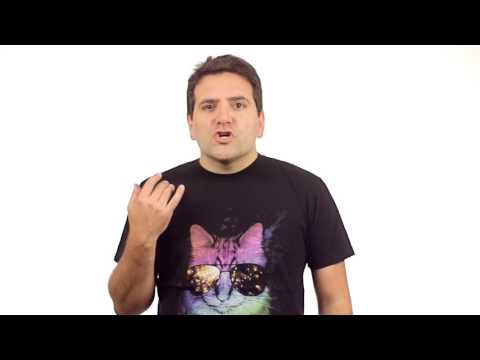

In [20]:
id = 'p9ddj5CoOEc'
YouTubeVideo(id=id, width=600)